In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

In [2]:
data = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
data.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


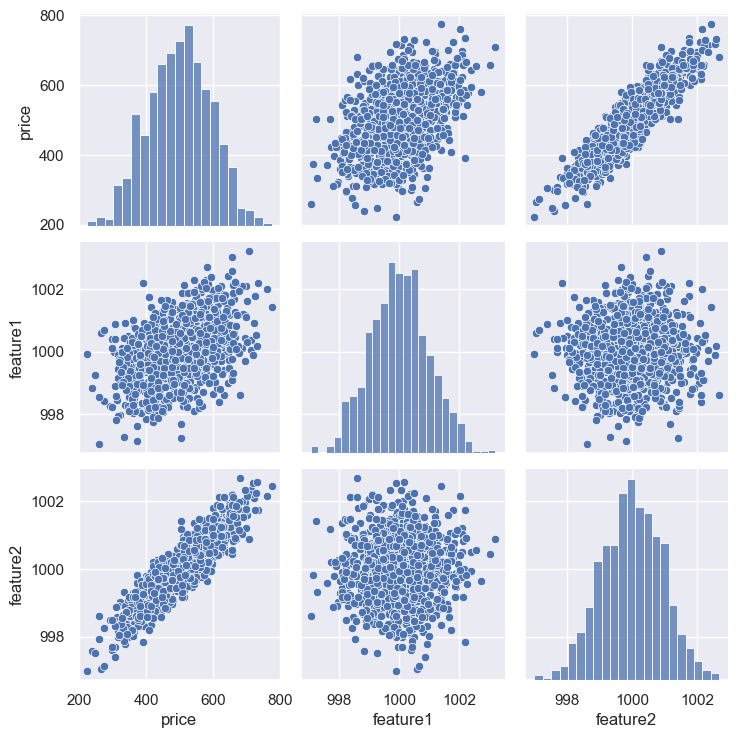

In [4]:
sns.pairplot(data=data)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 260091.2812   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256704.8125 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260648.9531 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251616.4531 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257188.5000 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255242.2188 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251996.0000 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253807.7344 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256048.7344 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253049.7031 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254868.7656 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256186.8281 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256354.6719 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [13]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

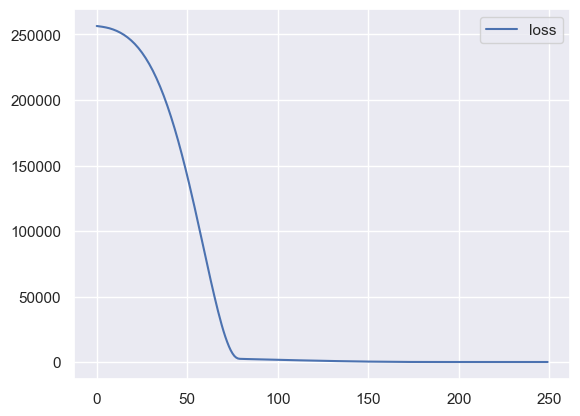

In [14]:
sns.lineplot(data=loss_df)

In [15]:
model.evaluate(X_train, y_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.2314  


24.006916046142578

In [16]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.7047 


25.805614471435547

In [17]:
predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


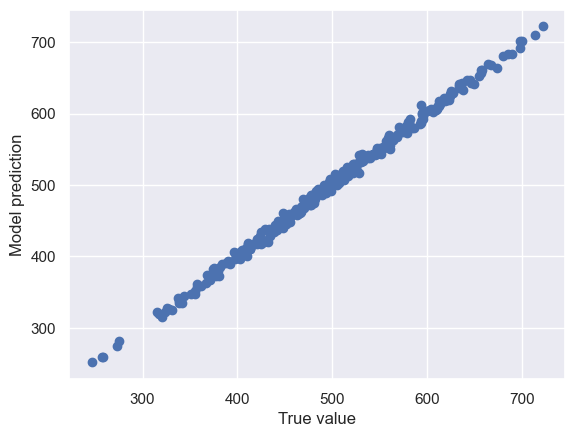

In [18]:
plt.scatter(x=y_test, y=predictions)
plt.xlabel('True value')
plt.ylabel('Model prediction')
plt.show()

In [19]:
from tensorflow.keras.models import load_model

In [20]:
model.save('my_model.keras')

In [21]:
loaded_model = load_model('my_model.keras')

In [22]:
predictions = loaded_model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


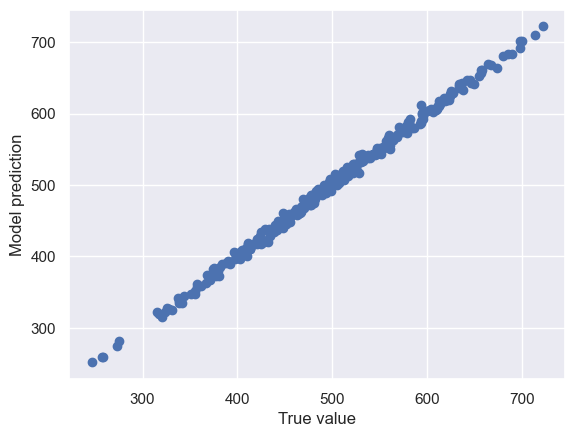

In [23]:
plt.scatter(x=y_test, y=predictions)
plt.xlabel('True value')
plt.ylabel('Model prediction')
plt.show()